# 수업듣다가 만들어본 바이낸스 api를 통한 골든크로스 전략 응용

20분 이동평균선 상향 돌파 Signal
  - 2024-07-16 16:39:00  Signal 발생!  매수주가 64489  ->  매도주가 64463  , 수익률 -0.041 %
  - 2024-07-16 16:51:00  Signal 발생!  매수주가 64386  ->  매도주가 64185  , 수익률 -0.313 %
  - 2024-07-16 16:58:00  Signal 발생!  매수주가 64403  ->  매도주가 64318  , 수익률 -0.131 %
  - 2024-07-16 17:17:00  Signal 발생!  매수주가 64306  ->  매도주가 64312  , 수익률 0.009 %
  - 2024-07-16 17:32:00  Signal 발생!  매수주가 64300  ->  매도주가 64500  , 수익률 0.311 %
  - 2024-07-16 17:34:00  Signal 발생!  매수주가 64333  ->  매도주가 64538  , 수익률 0.319 %
  - 2024-07-16 17:38:00  Signal 발생!  매수주가 64326  ->  매도주가 64482  , 수익률 0.242 %
  - 2024-07-16 17:59:00  Signal 발생!  매수주가 64510  ->  매도주가 64597  , 수익률 0.134 %
  - 2024-07-16 18:05:00  Signal 발생!  매수주가 64508  ->  매도주가 64715  , 수익률 0.321 %
  - 2024-07-16 18:16:00  Signal 발생!  매수주가 64519  ->  매도주가 64695  , 수익률 0.273 %
  - 2024-07-16 18:54:00  Signal 발생!  매수주가 64623  ->  매도주가 64887  , 수익률 0.408 %
  - 2024-07-16 19:21:00  Signal 발생!  매수주가 64843  ->  매도주가 64885  , 수익률 0.065 %
  - 2024-07-16 19:39:00  S

/var/folders/qf/f467m8qs4rv1gpzcgr0nqbjm0000gn/T/ipykernel_84260/3733584616.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  직전_주가 = using_case["Close"][i-1]
/var/folders/qf/f467m8qs4rv1gpzcgr0nqbjm0000gn/T/ipykernel_84260/3733584616.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  당일_주가 = using_case["Close"][i]
/var/folders/qf/f467m8qs4rv1gpzcgr0nqbjm0000gn/T/ipykernel_84260/3733584616.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `se

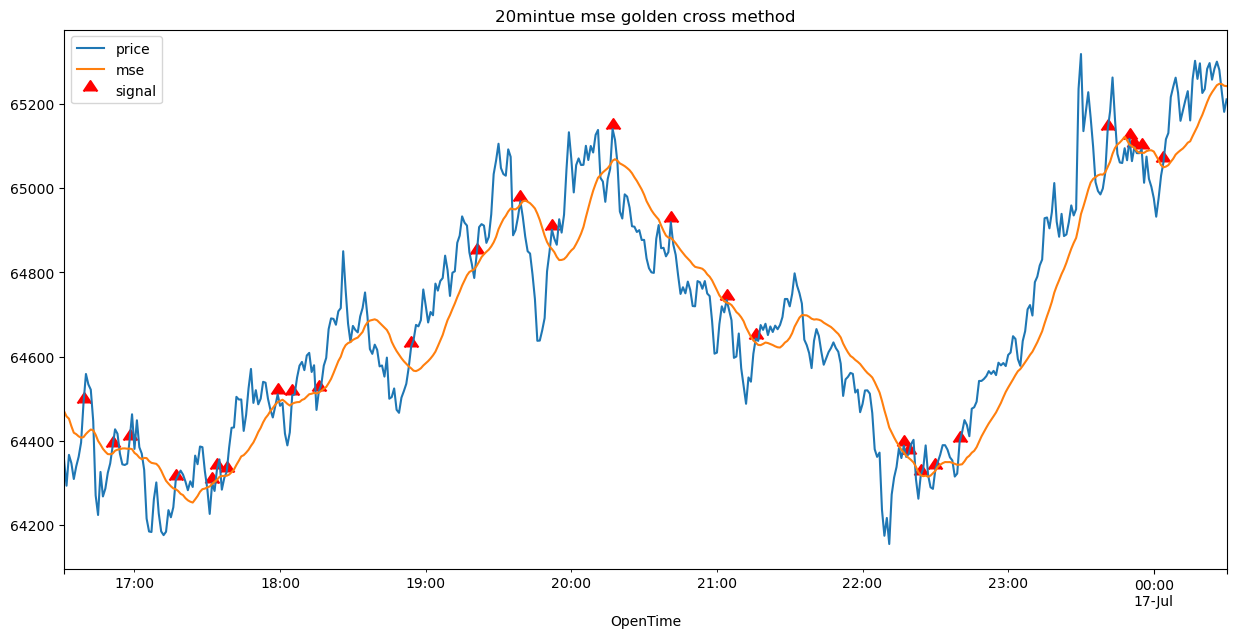

In [1]:
# 바이낸스 선물 차트로 적용하기 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import time
Ticker = 'BTCUSDT' #비트코인, 달러코인 페어
interval = '1m' # 1분봉
startTime = "1721066160000"# 시간지정 유닉스타임
data=requests.get(f"https://fapi.binance.com/fapi/v1/markPriceKlines?symbol={Ticker}&interval={interval}&startTime ={startTime}")
dic=json.loads(data.text) # json을 dict타입으로 변환
df= pd.DataFrame(dic,columns=["OpenTime","Open","High","Low","Close","x","CloseTime","x2","x3","x3","x4","x5"]) # DataFrame으로 만들기
df["OpenTime"] = pd.to_datetime(df['OpenTime'], unit='ms')
df.index = df["OpenTime"]
del df["OpenTime"]
using_case = pd.DataFrame(df["Close"])
using_case = using_case.astype('Float32')

## 강의에서 사용된 변수명은 수정하지 않음.
보유일 = 20
print(f"{보유일}분 이동평균선 상향 돌파 Signal")
using_case_rolling=using_case.rolling(보유일).mean()
#--------------------------------------------------------------------------------------------start
signal_i_list = []
signal_date_list = []
signal_price_list = []
signal_return_list = []
#--------------------------------------------------------------------------------------------end


for i in range(len(using_case)):
    if i < 1 or i > len(using_case) - 보유일:
        continue
    prev_date = using_case.index[i-1]
    now_date = using_case.index[i]
    직전_주가 = using_case["Close"][i-1]
    당일_주가 = using_case["Close"][i]
    직전_이평선 = using_case_rolling["Close"][i-1]
    당일_이평선 = using_case_rolling["Close"][i]
    if 직전_주가 < 직전_이평선 and 당일_주가 > 당일_이평선 and i+보유일 < len(using_case):
        sell_date = using_case["Close"][i+보유일]
        매도시_주가 = using_case["Close"][i+보유일]
        수익률 = (매도시_주가-당일_주가) / 당일_주가*100
        print(f"  - {now_date}  Signal 발생!  매수주가 {당일_주가:.0f}  ->  매도주가 {매도시_주가:.0f}  , 수익률 {수익률:.3f} %")
        #--------------------------------------------------------------------------------------------start
        signal_i_list.append(using_case.index[i])
        signal_date_list.append(now_date)
        signal_price_list.append(당일_주가)
        signal_return_list.append(수익률)
        #--------------------------------------------------------------------------------------------end
print(f"총 시그널 발생 횟수: {len(signal_return_list)}, 총 수익률: {sum(signal_return_list)}")
using_case["Close"][20:].plot(figsize=(15,7), label='price');
using_case_rolling["Close"][20:].plot(label='mse');
plt.scatter(x=signal_i_list, y=signal_price_list, marker=10, color='red', s=100 , label='signal');
plt.title(f"{보유일}mintue mse golden cross method")
plt.legend();